<a href="https://colab.research.google.com/github/nik8839/deep_learning_project/blob/trial_1/Image_classification_simple_neural_network_validation_set_part_2_increasing_more_epochs_part_3_increased_filters_removed_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Reading all images from google drive

In [1]:
import os
from PIL import Image
import numpy as np
classes = []
data = []
Y = []
image_folder_path = '/content/drive/MyDrive/dataset'  # Change this to the path where your folders are extracted
folders = os.listdir(image_folder_path)
count = 0
for folder in folders:
    classes.append(folder)
    folder_path = os.path.join(image_folder_path, folder)
    if os.path.isdir(folder_path):
        print(f"Reading images from {folder}")
        images = os.listdir(folder_path)
        for image_name in images:
            Y.append(count)
            image_path = os.path.join(folder_path, image_name)
            image = Image.open(image_path)
            image = image.resize((224, 224), resample=Image.LANCZOS).convert('RGB')
            image_array = np.asarray(image)
            #image_array=image_array/255.0
            data.append(image_array)

        count += 1





Reading images from lightning
Reading images from rime
Reading images from glaze
Reading images from rainbow
Reading images from hail
Reading images from frost
Reading images from sandstorm
Reading images from rain
Reading images from snow
Reading images from fogsmog
Reading images from dew


In [2]:
# Convert the data list to a 4D numpy array
data = np.array(data)
# Convert the Y list to a numpy array
Y = np.array(Y)
# Check the shapes of data and Y
print("Shape of data:", data.shape)
print("Shape of Y:", Y.shape)

Shape of data: (6877, 224, 224, 3)
Shape of Y: (6877,)


In [4]:
#data=data/255

In [ ]:
normalized_data

In [ ]:
data.shape

Converted x vector to be the numpy array

In [3]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets with a specific random seed (random_state)
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
y_train

In [4]:
import tensorflow as tf
from tensorflow.keras import layers,models
import keras

In [16]:
from tensorflow.keras import regularizers
model=keras.Sequential([
      layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D((3,3)),
      layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D((3,3)),
      layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D((3,3)),
     # layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    #layers.MaxPool2D((3,3)),
      keras.layers.Flatten(),
     #keras.layers.Dense(100,activation='relu'),
    # keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
     # keras.layers.Dropout(0.5),
      keras.layers.Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
      #keras.layers.Dropout(0.2),
      #keras.layers.Dropout(0.5),
       keras.layers.Dense(60,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
      #keras.layers.Dropout(0.5),
       keras.layers.Dense(40,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
      #keras.layers.Dropout(0.5),
     keras.layers.Dense(20,activation='relu',kernel_regularizer=regularizers.l1(0.01)),
      #keras.layers.Dropout(0.5),
    keras.layers.Dense(11,activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_val, y_val))

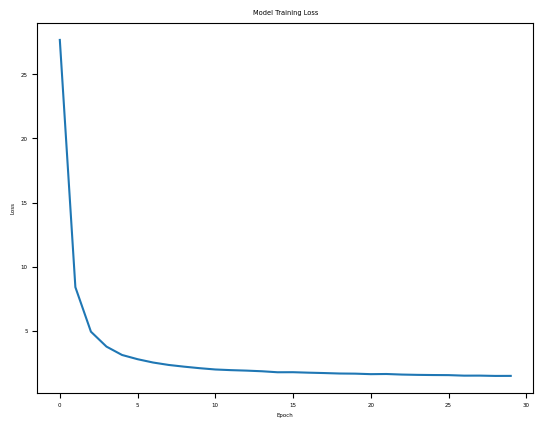

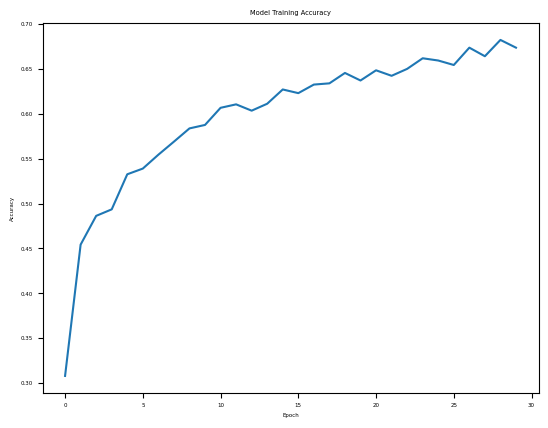

In [25]:
import matplotlib.pyplot as plt

#history = model.fit(X_train, y_train, epochs=100)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [18]:
model.evaluate(X_test,y_test)

43/43 [==============================] - 0s 10ms/step - loss: 1.5021 - accuracy: 0.6606


[1.5021114349365234, 0.6606104373931885]

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report\n",classification_report(y_test,y_pred_classes))

43/43 [==============================] - 0s 7ms/step
classification report
               precision    recall  f1-score   support

           0       0.69      0.91      0.79        87
           1       0.80      0.82      0.81       242
           2       0.45      0.27      0.34       117
           3       0.75      0.21      0.33        43
           4       0.51      0.62      0.56       128
           5       0.44      0.54      0.49       106
           6       0.74      0.81      0.77       125
           7       0.67      0.45      0.54       111
           8       0.44      0.49      0.46       106
           9       0.78      0.78      0.78       177
          10       0.80      0.84      0.82       134

    accuracy                           0.66      1376
   macro avg       0.64      0.61      0.61      1376
weighted avg       0.66      0.66      0.65      1376



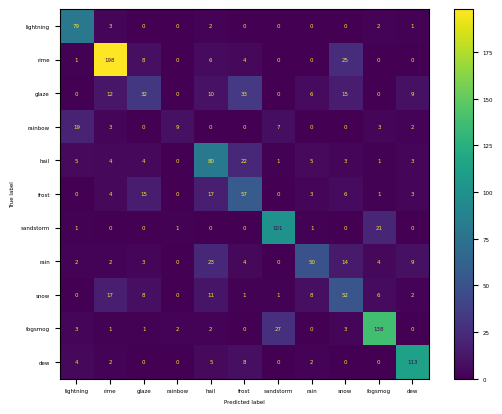

In [24]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_classes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [ele  for ele in classes])

cm_display.plot()
plt.rcParams['font.size'] =4
plt.show()
